Pipline de procesamiento de datos categóricos:
Las formas más naturales son:
1. Dummy: Representación compacta y Mejor para inputs linealmente independientes.

2. One Hot: Permite describir categorías no incluidas inicialmente.
La ventaja es que el nan puede clasificarse en un vector de tres ceros

In [1]:
import pandas as pd 
df = pd.read_csv('cars.csv')

pd.get_dummies(df['engine_type']) #Esto es un one hot

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [3]:
#Trabajando en sckitlearn

import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore') #Esto permite los vectores de cero

In [4]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [7]:
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [8]:
encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

Correlación:
la covarianza es la relación entre dos variables. 

El Coeficiente de correlación es más estándar por que no tiene en cuenta las unidades

También se debe saber la matriz de covarianza el cual relaciona todas las correlaciones entre todas las variables de mi modelo. 

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
iris = sns.load_dataset('iris')

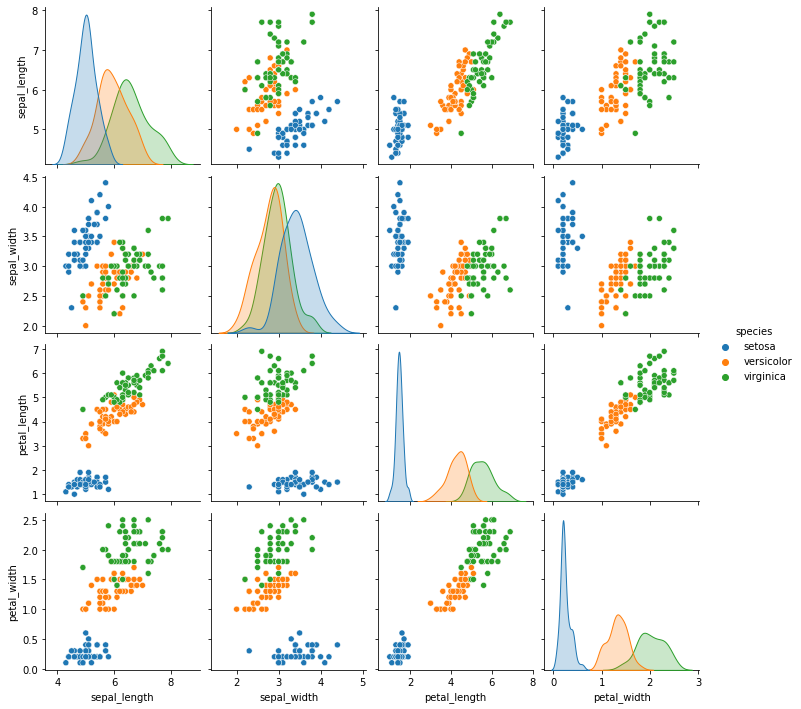

In [11]:
sns.pairplot(iris, hue = 'species') #Sirve para pocas variables

In [18]:
scaler = StandardScaler() #Esto me los vuelve Zstandar
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

In [19]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

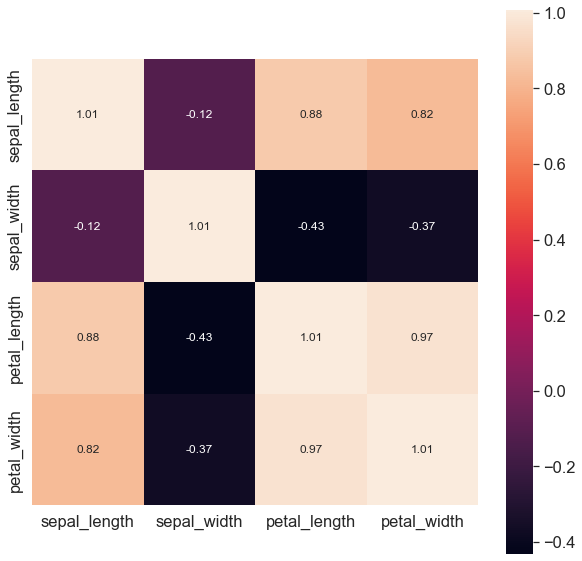

In [20]:
plt.figure(figsize = (10,10))
sns.set(font_scale = 1.5)
hm = sns.heatmap(
    covariance_matrix,
    cbar = True,
    annot = True,
    square = True,
    fmt = '.2f',
    annot_kws = {'size': 12},
    yticklabels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    xticklabels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

A continuación se hará la reducción de dimensionalidad con PCA con el objetivo de poder reducir el procesamiento a los algoritmos de ML

In [21]:
scaler = StandardScaler() #Esto me los vuelve Zstandar
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
)

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

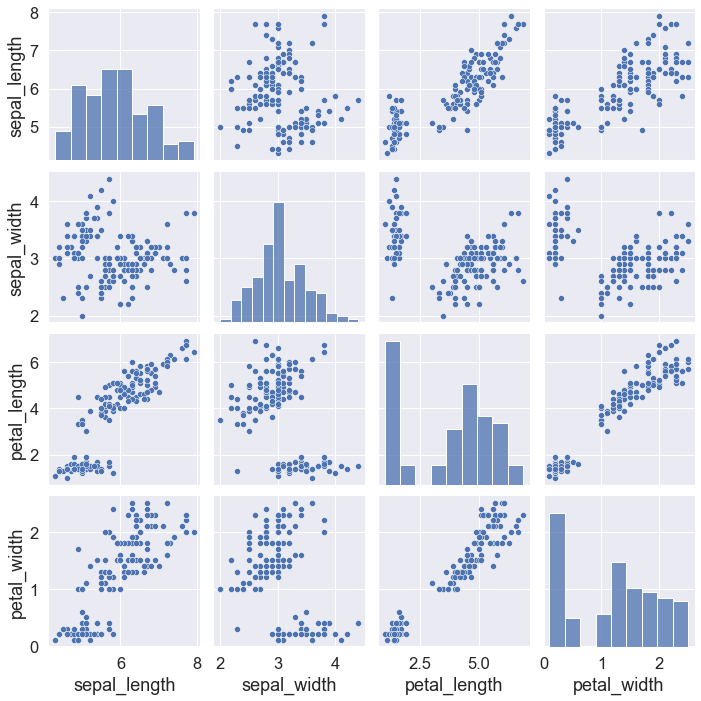

In [22]:
sns.pairplot(iris)

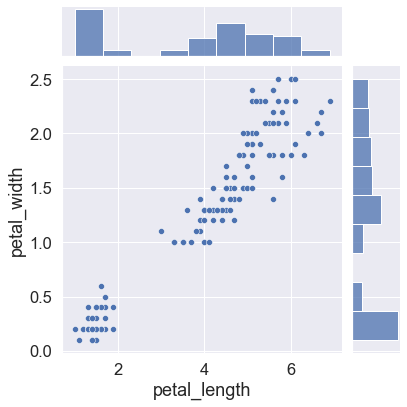

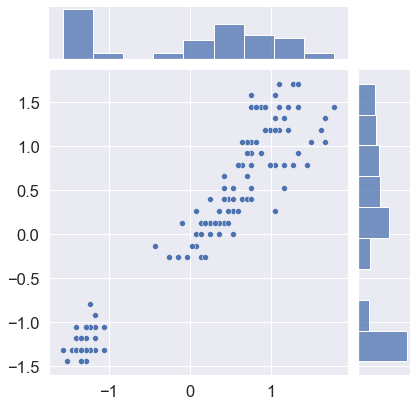

In [24]:
sns.jointplot(x = iris['petal_length'], y = iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:, 3])

In [25]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [27]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
print(variance_explained)

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scaled)

PCA(n_components=2)

In [29]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [30]:
reduced_scaled = pca.transform(scaled)

c:\Users\furruchurtu\OneDrive - LITOPLAS SA\Documentos\python\development_ve\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


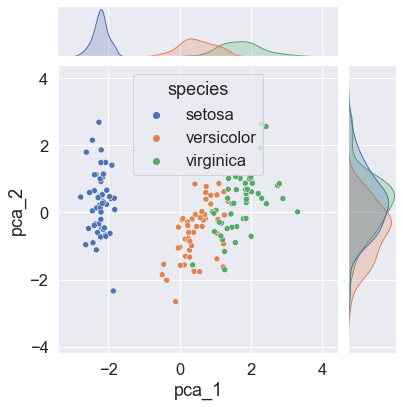

In [34]:
iris['pca_1'] = reduced_scaled[:, 0]
iris['pca_2'] = reduced_scaled[:, 1]
sns.jointplot(iris['pca_1'], iris['pca_2'], hue=iris['species'])